In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#Read images into a pandas data frame

In [4]:
df = pd.read_csv('paintings.csv')

In [7]:
print('Number of paintings:', df.shape[0])
df.head()

Number of paintings: 8774


,Unnamed: 0,artist,picture,Van Gogh,0x0 R,0x0 G,0x0 B,0x1 R,0x1 G,0x1 B,...,99x96 B,99x97 R,99x97 G,99x97 B,99x98 R,99x98 G,99x98 B,99x99 R,99x99 G,99x99 B
0,0,Albrecht_DuGòá+¬rer,Albrecht_DuGòá+¬rer_1.jpg,0,166,166,166.0,160,160,160.0,...,167.0,168,168,168.0,170,170,170.0,172,172,172.0
1,1,Albrecht_DuGòá+¬rer,Albrecht_DuGòá+¬rer_10.jpg,0,157,157,157.0,159,159,159.0,...,147.0,154,154,154.0,163,163,163.0,169,169,169.0
2,2,Albrecht_DuGòá+¬rer,Albrecht_DuGòá+¬rer_100.jpg,0,174,174,174.0,164,164,164.0,...,102.0,113,113,113.0,102,102,102.0,82,82,82.0
3,3,Albrecht_DuGòá+¬rer,Albrecht_DuGòá+¬rer_101.jpg,0,217,215,194.0,202,200,179.0,...,170.0,177,176,158.0,189,188,170.0,211,210,192.0
4,4,Albrecht_DuGòá+¬rer,Albrecht_DuGòá+¬rer_102.jpg,0,230,230,230.0,231,231,231.0,...,231.0,231,231,231.0,231,231,231.0,231,231,231.0


In [8]:
#Some data cleaning
X = df.drop(['artist','picture','Van Gogh'],axis=1) #data points
y = df['Van Gogh'] #labels

#convert pandas data frames into numpy arrays
X = (X.to_numpy()[:,1:]/255).reshape((-1, 100, 100, 3))
y = y.to_numpy()

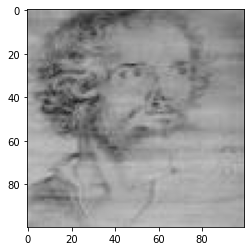

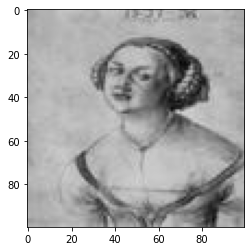

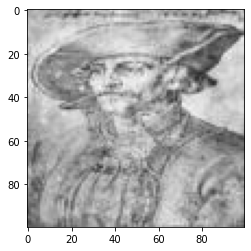

In [10]:
#Let us plot some images
for i in range(3):
    plt.figure()
    plt.imshow(X[i])
plt.show()

In [15]:
#In our data, the number of Van Gogh paintings is much smaller than non Van Gogh paintings

print('Number of Van Gogh paintings in the data set:', sum(y))
print('Number of non Van Gogh paintings in the data set;', len(y) - sum(y))

Number of Van Gogh paintings in the data set: 877
Number of non Van Gogh paintings in the data set; 7897


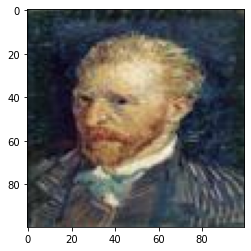

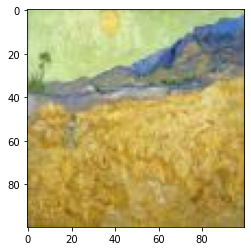

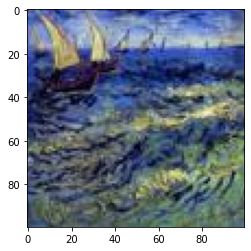

In [16]:
#Let us plot some Van Gogh paintings:
i = 0
j = 0
while True:
    if y[i]==1:
        plt.figure()
        plt.imshow(X[i])
        j += 1
        if j == 3:
            break
    i += 1
plt.show()

In [14]:
#split the data for training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size = 0.2,
                                                   shuffle = True,
                                                   stratify = y)

In [17]:
#We are going to use CNN for classification

In [18]:
from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics
from keras.utils import to_categorical

In [20]:
#We are going to use the following model structure, but train it in differen ways.

def MyModel():
    model = models.Sequential()
    model.add( layers.Conv2D(64, (3,3), activation='relu', input_shape=(100,100,3)) )
    model.add( layers.MaxPooling2D((2,2), strides=2) )
    model.add( layers.Conv2D(64, (3,3), activation='relu') )
    model.add( layers.MaxPooling2D((2,2), strides=2) )
    model.add( layers.Conv2D(64, (3,3), activation='relu') )
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(2, activation='softmax'))
    return model

model = MyModel()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 98, 98, 64)        1792      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 49, 49, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 47, 47, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 21, 21, 64)        36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 28224)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

In [21]:
#Let us split the training set into training and validation parts, and see how our model
#works

In [22]:
X_train_train, X_val, y_train_train, y_val = train_test_split(X_train, y_train,
                                                             test_size = 0.2,
                                                             shuffle = True,
                                                             stratify = y_train)

In [97]:
model_base = MyModel()
model_base.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model_base.fit(X_train_train,to_categorical(y_train_train),
         epochs = 7,
         validation_data = (X_val, to_categorical(y_val)))

Epoch 1/7
176/176 [==============================] - 49s 275ms/step - loss: 0.3543 - accuracy: 0.9007 - val_loss: 0.2833 - val_accuracy: 0.9003
Epoch 2/7
176/176 [==============================] - 51s 287ms/step - loss: 0.2964 - accuracy: 0.8978 - val_loss: 0.3068 - val_accuracy: 0.9003
Epoch 3/7
176/176 [==============================] - 50s 283ms/step - loss: 0.2817 - accuracy: 0.8962 - val_loss: 0.2705 - val_accuracy: 0.9024
Epoch 4/7
176/176 [==============================] - 49s 281ms/step - loss: 0.2571 - accuracy: 0.9006 - val_loss: 0.3324 - val_accuracy: 0.8996
Epoch 5/7
176/176 [==============================] - 50s 285ms/step - loss: 0.2239 - accuracy: 0.9046 - val_loss: 0.2750 - val_accuracy: 0.9003
Epoch 6/7
176/176 [==============================] - 49s 280ms/step - loss: 0.2049 - accuracy: 0.9118 - val_loss: 0.2958 - val_accuracy: 0.8989
Epoch 7/7
176/176 [==============================] - 49s 278ms/step - loss: 0.1726 - accuracy: 0.9293 - val_loss: 0.3270 - val_accuracy:

In [104]:
#Although accuracy is high, it is not a very meaningful measure here since the one class is
#much more represented. Let us also check recall and precision

In [105]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [106]:
def modelScore(model,X,y):
    y_pred_proba = model.predict(X)
    y_pred = np.array([np.argmax(x) for x in y_pred_proba])
    
    acc = accuracy_score(y, y_pred)
    prec = precision_score(y, y_pred)
    rec = recall_score(y,y_pred)
    unbalanced = {'Accuracy':acc, 'Precision':prec, 'Recall':rec}
    
    indvg = [i for i in range(len(y)) if y[i]==1]
    indnvg = [i for i in range(len(y)) if y[i]==0]
    acc, prec, rec = 0, 0, 0
    for i in range(5):
        indval = indvg + random.sample(indnvg, len(indvg))
        acc += accuracy_score(y[indval], y_pred[indval])
        prec += precision_score(y[indval], y_pred[indval])
        rec += recall_score(y[indval], y_pred[indval])
    balanced = {'Accuracy':acc/5, 'Precision':prec/5, 'Recall':rec/5}
    return {'Unbalanced': unbalanced, 'Balanced':balanced}

In [107]:
modelScore(model_base, X_val, y_val)

{'Unbalanced': {'Accuracy': 0.8888888888888888,
  'Precision': 0.4298245614035088,
  'Recall': 0.35},
 'Balanced': {'Accuracy': 0.6564285714285714,
  'Precision': 0.9057300439498583,
  'Recall': 0.35}}

In [102]:
#Let us try to improve the model by assigning higher weight to Van Gogh class.
model_weighted = MyModel()
model_weighted.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model_weighted.fit(X_train_train, to_categorical(y_train_train),
         epochs = 7,
         class_weight = {0:1, 1:5},
         validation_data = (X_val, to_categorical(y_val)))

Epoch 1/7
176/176 [==============================] - 50s 281ms/step - loss: 1.0141 - accuracy: 0.8672 - val_loss: 0.5158 - val_accuracy: 0.9003
Epoch 2/7
176/176 [==============================] - 50s 286ms/step - loss: 0.8893 - accuracy: 0.9006 - val_loss: 0.4277 - val_accuracy: 0.9003
Epoch 3/7
176/176 [==============================] - 49s 280ms/step - loss: 0.8850 - accuracy: 0.8999 - val_loss: 0.5219 - val_accuracy: 0.9003
Epoch 4/7
176/176 [==============================] - 48s 276ms/step - loss: 0.8504 - accuracy: 0.8998 - val_loss: 0.4185 - val_accuracy: 0.9003
Epoch 5/7
176/176 [==============================] - 49s 279ms/step - loss: 0.8297 - accuracy: 0.8823 - val_loss: 0.3622 - val_accuracy: 0.8511
Epoch 6/7
176/176 [==============================] - 50s 284ms/step - loss: 0.8147 - accuracy: 0.8172 - val_loss: 0.3895 - val_accuracy: 0.8668
Epoch 7/7
176/176 [==============================] - 50s 286ms/step - loss: 0.7938 - accuracy: 0.8453 - val_loss: 0.4667 - val_accuracy:

In [110]:
#Performance

modelScore(model_weighted, X_val, y_val)

{'Unbalanced': {'Accuracy': 0.7635327635327636,
  'Precision': 0.2125748502994012,
  'Recall': 0.5071428571428571},
 'Balanced': {'Accuracy': 0.6514285714285715,
  'Precision': 0.7142848362336731,
  'Recall': 0.5071428571428571}}

In [111]:
#We were able to increase the recall by using weights, but accuracy suffered a lot

In [112]:
#UNDERSAMPLING:
#As another strategy, let us sample much less amount of non Van Goghs from our data set to
#to be able to train over a balanced data.
import random

ind_vg = [i for i in range(len(y_train_train)) if y_train_train[i]==1] #indices of Van Gogh's in training
ind_nvg = [i for i in range(len(y_train_train)) if y_train_train[i]==0] #indices of non Van Gogh's
ind_train = ind_vg + random.sample(ind_nvg, len(ind_vg)) #indices for training
random.shuffle(ind_train)

model_under_single = MyModel()
model_under_single.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model_under_single.fit(X_train_train[ind_train],to_categorical(y_train_train[ind_train]),
         epochs = 15,
         validation_data = (X_val, to_categorical(y_val)))

Epoch 1/15
36/36 [==============================] - 14s 386ms/step - loss: 0.8334 - accuracy: 0.4593 - val_loss: 0.8349 - val_accuracy: 0.1040
Epoch 2/15
36/36 [==============================] - 13s 351ms/step - loss: 0.7039 - accuracy: 0.4985 - val_loss: 0.6496 - val_accuracy: 0.8412
Epoch 3/15
36/36 [==============================] - 13s 352ms/step - loss: 0.6668 - accuracy: 0.6203 - val_loss: 0.5461 - val_accuracy: 0.7934
Epoch 4/15
36/36 [==============================] - 13s 355ms/step - loss: 0.5920 - accuracy: 0.6857 - val_loss: 0.5376 - val_accuracy: 0.7678
Epoch 5/15
36/36 [==============================] - 14s 385ms/step - loss: 0.5671 - accuracy: 0.7016 - val_loss: 1.3114 - val_accuracy: 0.2265
Epoch 6/15
36/36 [==============================] - 13s 355ms/step - loss: 0.7505 - accuracy: 0.5549 - val_loss: 0.9810 - val_accuracy: 0.2714
Epoch 7/15
36/36 [==============================] - 13s 354ms/step - loss: 0.6358 - accuracy: 0.6497 - val_loss: 0.5509 - val_accuracy: 0.7322

In [114]:
#Performance

modelScore(model_under_single, X_val, y_val)

{'Unbalanced': {'Accuracy': 0.7172364672364673,
  'Precision': 0.19621749408983452,
  'Recall': 0.5928571428571429},
 'Balanced': {'Accuracy': 0.6528571428571428,
  'Precision': 0.6739748290635208,
  'Recall': 0.5928571428571429}}

In [115]:
#High recall, but low accuracy and precision
#But we only used a very small part of non Van Gogh data
#let us keep training the same model with the different parts of the non Van Goghs

model_under_mult = MyModel()
model_under_mult.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

for i in range(7):
    print('\nTraining:', i+1, 'of', 7)
    ind_train = ind_vg + random.sample(ind_nvg, len(ind_vg)) #indices for training
    random.shuffle(ind_train)
    model_under_mult.fit(X_train_train[ind_train],to_categorical(y_train_train[ind_train]),
         epochs = 7,
         validation_data = (X_val, to_categorical(y_val)))


Training: 1 of 7
Epoch 1/7
36/36 [==============================] - 13s 367ms/step - loss: 0.7250 - accuracy: 0.5728 - val_loss: 0.3029 - val_accuracy: 0.8996
Epoch 2/7
36/36 [==============================] - 13s 357ms/step - loss: 0.7203 - accuracy: 0.5801 - val_loss: 0.8037 - val_accuracy: 0.4202
Epoch 3/7
36/36 [==============================] - 14s 379ms/step - loss: 0.6528 - accuracy: 0.6378 - val_loss: 0.3788 - val_accuracy: 0.8946
Epoch 4/7
36/36 [==============================] - 13s 358ms/step - loss: 0.6531 - accuracy: 0.6235 - val_loss: 0.8856 - val_accuracy: 0.2877
Epoch 5/7
36/36 [==============================] - 13s 360ms/step - loss: 0.5487 - accuracy: 0.7363 - val_loss: 0.7027 - val_accuracy: 0.5556
Epoch 6/7
36/36 [==============================] - 13s 357ms/step - loss: 0.5602 - accuracy: 0.7259 - val_loss: 0.3885 - val_accuracy: 0.8440
Epoch 7/7
36/36 [==============================] - 13s 360ms/step - loss: 0.5506 - accuracy: 0.7048 - val_loss: 0.8463 - val_accur

In [116]:
ModelList.append(model_under_mult)

In [117]:
modelScore(model_under_mult, X_val, y_val)

{'Unbalanced': {'Accuracy': 0.8262108262108262,
  'Precision': 0.292,
  'Recall': 0.5214285714285715},
 'Balanced': {'Accuracy': 0.6900000000000001,
  'Precision': 0.78959667328962,
  'Recall': 0.5214285714285715}}

In [118]:
#Up to now, this is the only instance we get high accuracy and relatively high recall

In [121]:
#OVERSAMPLING
#Instead of sampling a smaller part of non Van Gogh, let us add copies of Van Goghs to the
#training data so that the data becomes balanced

ind_vg = [i for i in range(len(y_train_train)) if y_train_train[i]==1] #indices of Van Gogh's in training
ind_nvg = [i for i in range(len(y_train_train)) if y_train_train[i]==0] #indices of non Van Gogh's
N = round(len(ind_nvg)/len(ind_vg))
ind_train = N*ind_vg + ind_nvg #indices for training
random.shuffle(ind_train)

model_over = MyModel()
model_over.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model_over.fit(X_train_train[ind_train],to_categorical(y_train_train[ind_train]),
         epochs = 4,
         validation_data = (X_val, to_categorical(y_val)))

Epoch 1/4
316/316 [==============================] - 87s 272ms/step - loss: 0.6928 - accuracy: 0.5549 - val_loss: 0.4805 - val_accuracy: 0.7885
Epoch 2/4
316/316 [==============================] - 85s 268ms/step - loss: 0.5220 - accuracy: 0.7447 - val_loss: 0.4969 - val_accuracy: 0.7536
Epoch 3/4
316/316 [==============================] - 84s 266ms/step - loss: 0.3516 - accuracy: 0.8459 - val_loss: 0.4615 - val_accuracy: 0.8205
Epoch 4/4
316/316 [==============================] - 86s 271ms/step - loss: 0.1840 - accuracy: 0.9318 - val_loss: 0.5813 - val_accuracy: 0.8704


In [122]:
modelScore(model_over, X_val, y_val)

{'Unbalanced': {'Accuracy': 0.8703703703703703,
  'Precision': 0.3719512195121951,
  'Recall': 0.4357142857142857},
 'Balanced': {'Accuracy': 0.6735714285714286,
  'Precision': 0.8312852852852852,
  'Recall': 0.4357142857142858}}

In [131]:
ModelList = {"Base CNN":model_base, "Weighted":model_weighted,"Down sample": model_under_mult, "Over sample":model_over}

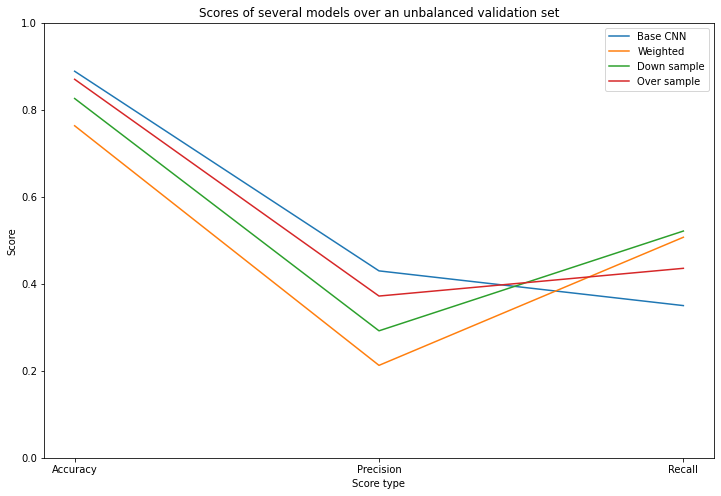

In [148]:
plt.figure(figsize=[12,8])
for modelName in ModelList:
    model = ModelList[modelName]
    sc = modelScore(model, X_val, y_val)
    unbal = sc['Unbalanced']
    plt.plot(unbal.keys(),unbal.values(), label = modelName)
plt.xlabel('Score type')
plt.ylabel('Score')
plt.ylim(0,1)
plt.title('Scores of several models over an unbalanced validation set')
plt.legend()
plt.show()

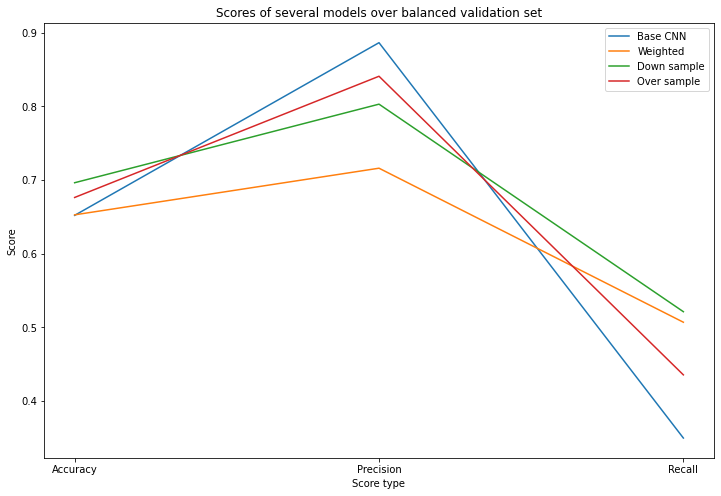

In [135]:
plt.figure(figsize=[12,8])
for modelName in ModelList:
    model = ModelList[modelName]
    sc = modelScore(model, X_val, y_val)
    bal = sc['Balanced']
    plt.plot(bal.keys(),bal.values(), label = modelName)
plt.xlabel('Score type')
plt.ylabel('Score')
plt.title('Scores of several models over balanced validation set')
plt.legend()
plt.show()

In [136]:
# In summary:
# To have higher recall, the models sacrifice some accuracy
# Over sampling and under sampling seems perfoming better than others

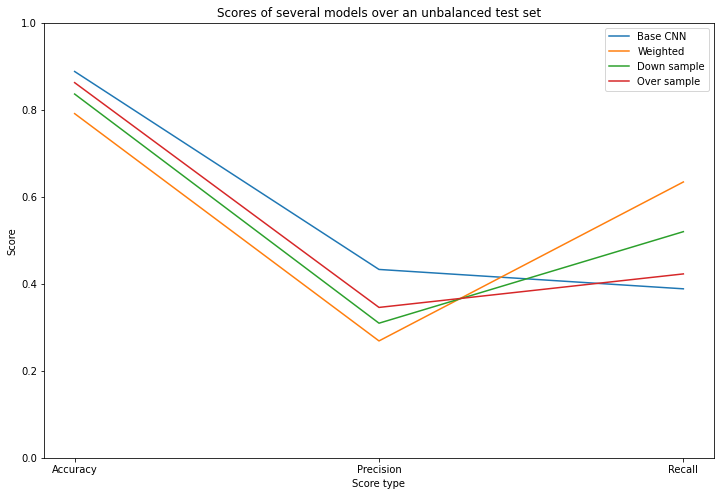

In [146]:
plt.figure(figsize=[12,8])
for modelName in ModelList:
    model = ModelList[modelName]
    sc = modelScore(model, X_test, y_test)
    unbal = sc['Unbalanced']
    plt.plot(unbal.keys(),unbal.values(), label = modelName)
plt.xlabel('Score type')
plt.ylabel('Score')
plt.ylim(0,1)
plt.title('Scores of several models over an unbalanced test set')
plt.legend()
plt.show()

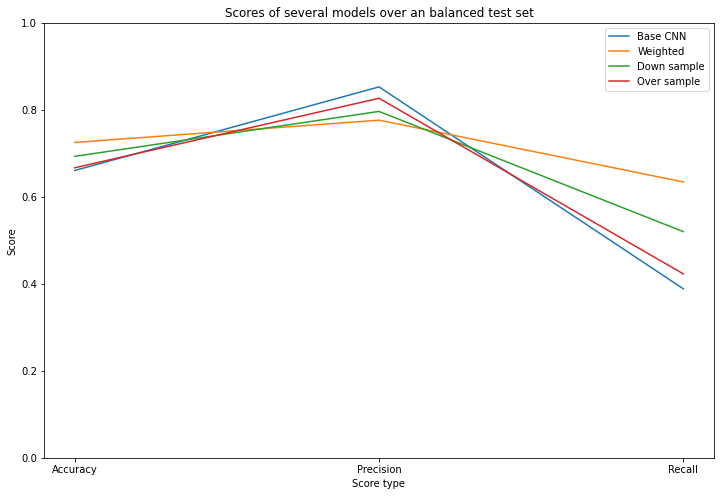

In [147]:
plt.figure(figsize=[12,8])
for modelName in ModelList:
    model = ModelList[modelName]
    sc = modelScore(model, X_test, y_test)
    bal = sc['Balanced']
    plt.plot(bal.keys(),bal.values(), label = modelName)
plt.xlabel('Score type')
plt.ylabel('Score')
plt.title('Scores of several models over an balanced test set')
plt.ylim(0,1)
plt.legend()
plt.show()

In [150]:
print('Performance on validation set')
for modelName in ModelList:
    model = ModelList[modelName]
    sc = modelScore(model, X_val, y_val)
    print('\n'+modelName)
    print(sc)

Performance on validation set

Base CNN
{'Unbalanced': {'Accuracy': 0.8888888888888888, 'Precision': 0.4298245614035088, 'Recall': 0.35}, 'Balanced': {'Accuracy': 0.6528571428571428, 'Precision': 0.8885731812047603, 'Recall': 0.35}}

Weighted
{'Unbalanced': {'Accuracy': 0.7635327635327636, 'Precision': 0.2125748502994012, 'Recall': 0.5071428571428571}, 'Balanced': {'Accuracy': 0.6428571428571429, 'Precision': 0.6970926999423789, 'Recall': 0.5071428571428571}}

Down sample
{'Unbalanced': {'Accuracy': 0.8262108262108262, 'Precision': 0.292, 'Recall': 0.5214285714285715}, 'Balanced': {'Accuracy': 0.6857142857142856, 'Precision': 0.776972887570474, 'Recall': 0.5214285714285715}}

Over sample
{'Unbalanced': {'Accuracy': 0.8703703703703703, 'Precision': 0.3719512195121951, 'Recall': 0.4357142857142857}, 'Balanced': {'Accuracy': 0.6728571428571429, 'Precision': 0.8294467185312258, 'Recall': 0.4357142857142858}}


In [149]:
print('Performance on test set')
for modelName in ModelList:
    model = ModelList[modelName]
    sc = modelScore(model, X_test, y_test)
    print('\n'+modelName)
    print(sc)

Performance on test set

Base CNN
{'Unbalanced': {'Accuracy': 0.8883190883190883, 'Precision': 0.43312101910828027, 'Recall': 0.38857142857142857}, 'Balanced': {'Accuracy': 0.6622857142857143, 'Precision': 0.8598745425127836, 'Recall': 0.38857142857142857}}

Weighted
{'Unbalanced': {'Accuracy': 0.7914529914529914, 'Precision': 0.2687651331719128, 'Recall': 0.6342857142857142}, 'Balanced': {'Accuracy': 0.7194285714285714, 'Precision': 0.7648985061349944, 'Recall': 0.6342857142857142}}

Down sample
{'Unbalanced': {'Accuracy': 0.8364672364672364, 'Precision': 0.30952380952380953, 'Recall': 0.52}, 'Balanced': {'Accuracy': 0.6874285714285715, 'Precision': 0.7828454703196586, 'Recall': 0.52}}

Over sample
{'Unbalanced': {'Accuracy': 0.8626780626780627, 'Precision': 0.34579439252336447, 'Recall': 0.4228571428571429}, 'Balanced': {'Accuracy': 0.6651428571428571, 'Precision': 0.8208215875811581, 'Recall': 0.4228571428571429}}
